In [2]:
import  numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical,plot_model
from keras.models import Sequential
from keras.layers import Dense,Softmax,Activation
from keras.optimizers import Adam
from keras.metrics import categorical_accuracy
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

(60000, 28, 28) (60000,)
5
(60000, 784) (60000,)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

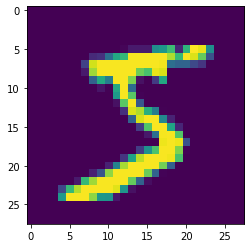

In [3]:
#preprocessing data
(x_train, y_train), (x_test, y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)  #(60000, 28, 28) (60000,)
image_size=x_train.shape[1]
#plot image
image_0=x_train[0]
plt.imshow(image_0)
print(y_train[0])

x_train=x_train.reshape((-1,image_size*image_size))  
x_test=x_test.reshape((-1,image_size*image_size))
print(x_train.shape , y_train.shape)  #(60000, 784) (60000,)
x_train=x_train.astype(dtype='float32')
x_test=x_test.astype(dtype='float32')
#print(y_train[:5])  #[5 0 4 1 9]

y_train=to_categorical(y_train)  #(60000,10)
y_test=to_categorical(y_test)
y_train[0]

In [9]:
#hyper parameters
n_output=10      #len(np.unique(y_train))  :2 
n_input=image_size*image_size
hidden_layers=[256,256]   # we need 2 hidden layers ,each 256 units
activation_function='relu'

In [10]:
model=Sequential()
#add hidden layer 1
model.add(Dense(units=hidden_layers[0],input_dim=n_input,name='hidden_layer1'))
model.add(Activation(activation_function , name='relu_1'))
#add hidden layer 2
model.add(Dense(units=hidden_layers[1],name='hidden_layer2'))
model.add(Activation(activation_function , name='relu_2'))

#add output layer
model.add(Dense(units=n_output,name='output_layer'))
model.add(Activation('softmax' , name='softmax'))

model.summary()
plot_model(model=model,to_file='MNISt_mlp.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 256)               200960    
_________________________________________________________________
relu_1 (Activation)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
relu_2 (Activation)          (None, 256)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model.compile(optimizer='adam',loss='categorical_crossentropy')
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['acc'])


In [13]:
#train the model
model_history=model.fit(x=x_train,y=y_train,epochs=20,batch_size=32)

W0825 23:45:06.304034 19052 deprecation.py:323] From d:\program files\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 23:45:06.362912 19052 deprecation_wrapper.py:119] From d:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 14.5270 - acc: 0.0987
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 14.5270 - acc: 0.0987
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 14.5270 - acc: 0.0987
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 14.5270 - acc: 0.0987
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 14.5270 - acc: 0.0987
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 14.5270 - acc: 0.0987
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 14.5270 - acc: 0.0987
Epoch 8/20
60000/60000 [==============================] - 6s 99us/step - loss: 14.5270 - acc: 0.0987
Epoch 9/20
60000/60000 [==============================] - 6s 99us/step - loss: 14.5270 - acc: 0.0987
Epoch 10/20
60000/60000 [==============================] - 6s 99us/step - loss: 14.5270 -

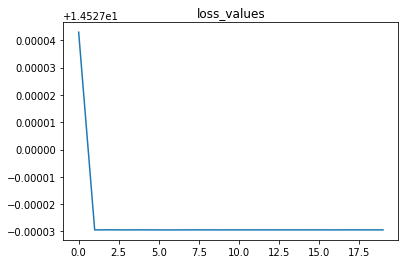

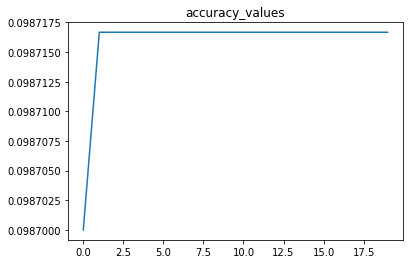

In [14]:
#plot loss and accuracy
loss_values=model_history.history['loss']
plt.figure()
plt.title('loss_values')
plt.plot(loss_values)


accuracy_values=model_history.history['acc']
plt.figure()
plt.title('accuracy_values')
plt.plot(accuracy_values)

In [15]:
type(y_train)

numpy.ndarray